# First :Reading file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
diamonds = pd.read_csv("diamonds.csv")

# Explore the data

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamonds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
diamonds["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
diamonds["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Data Visualisation 

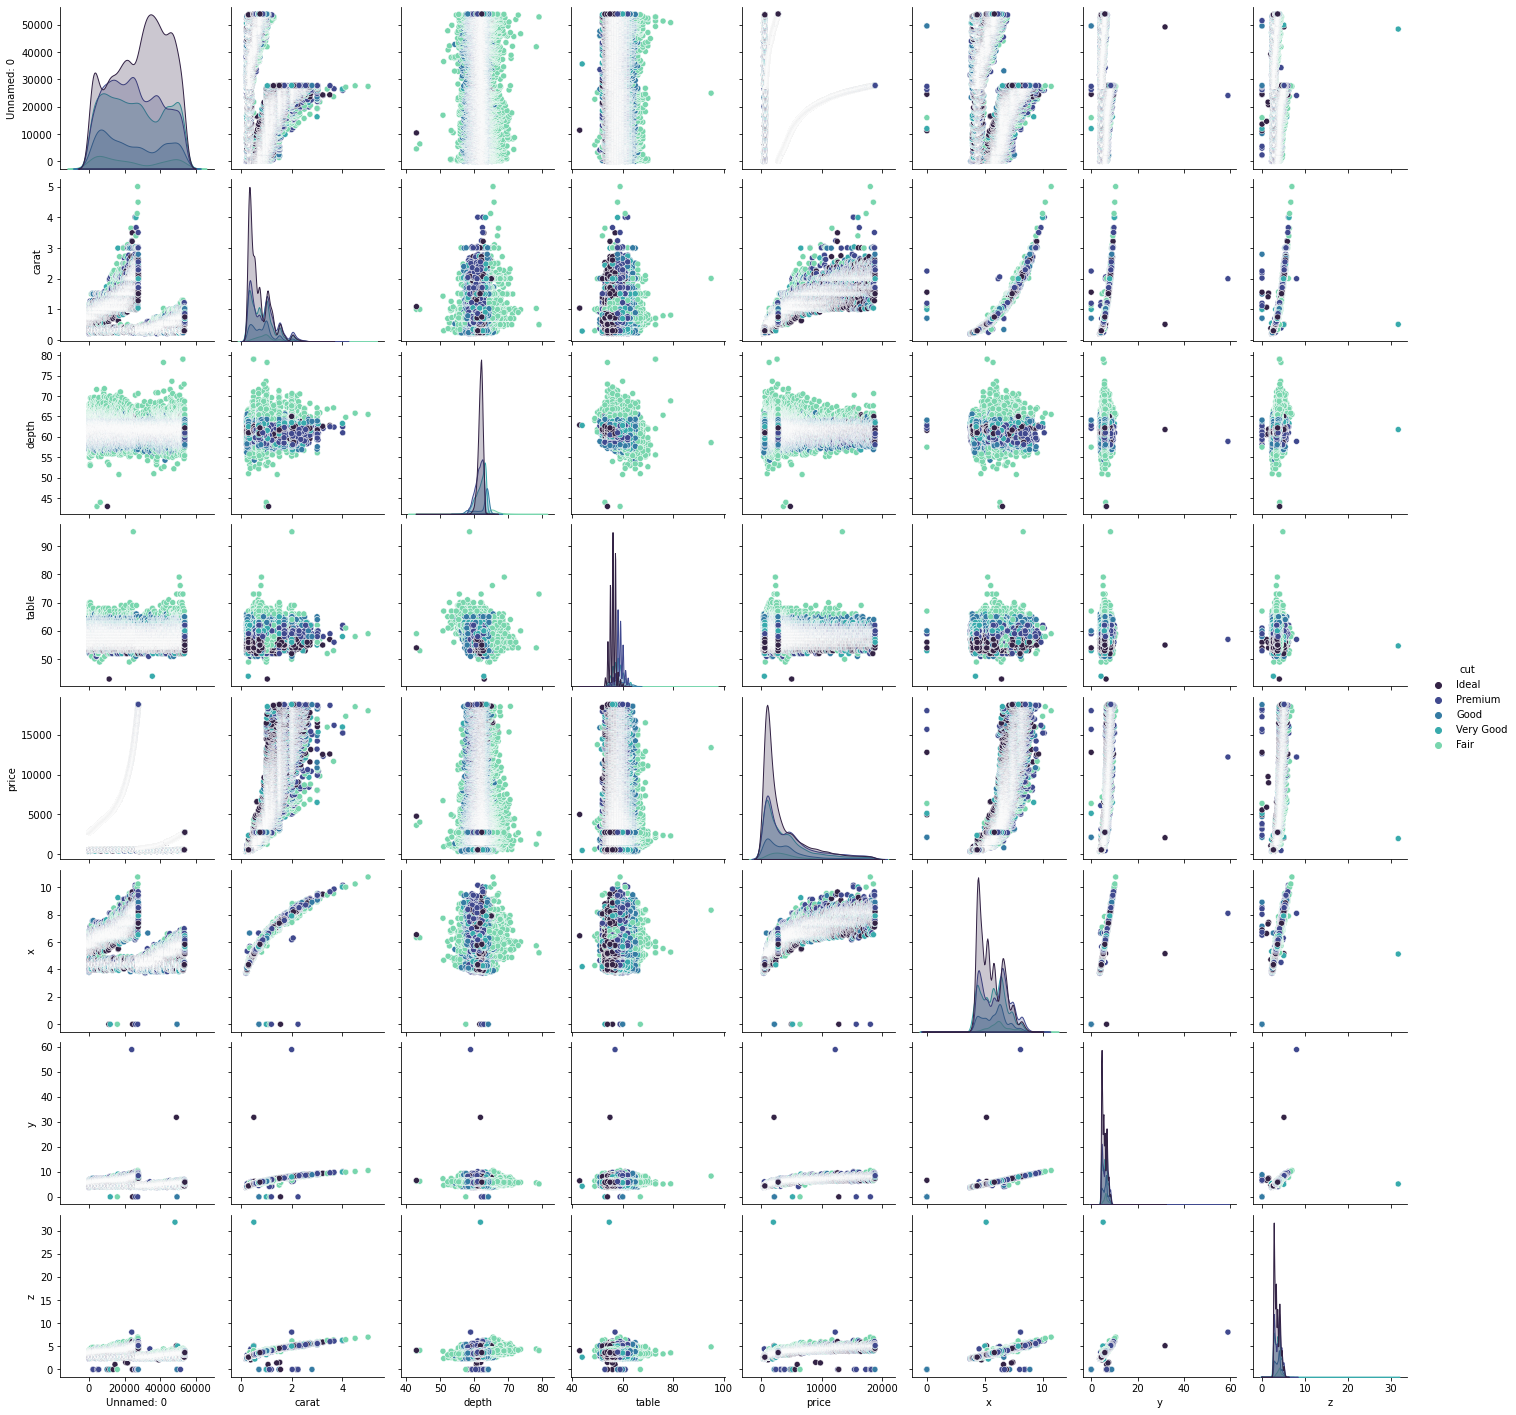

In [12]:
sns.pairplot(diamonds, hue="cut",palette="mako")

#### Visualizing categorical data

<AxesSubplot:xlabel='cut', ylabel='price'>

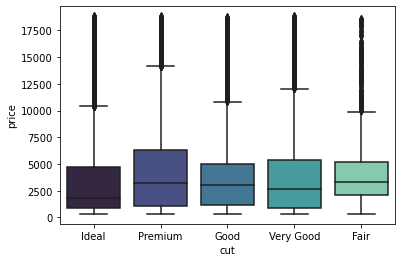

In [11]:
sns.boxplot(data=diamonds, orient="v",x='cut', y='price', palette="mako") 

<AxesSubplot:xlabel='color', ylabel='price'>

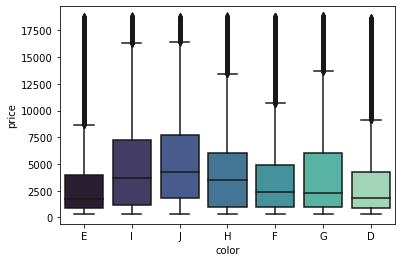

In [13]:
sns.boxplot(data=diamonds, orient="v",x='color', y='price', palette="mako")

<AxesSubplot:xlabel='clarity', ylabel='price'>

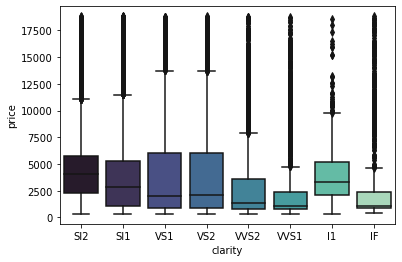

In [14]:
sns.boxplot(data=diamonds, orient="v",x='clarity', y='price', palette="mako")

# Data Cleaning 

#### The first column is an index ("Unnamed: 0") and thus we are going to remove it.

In [15]:
diamonds.drop('Unnamed: 0', axis = 1, inplace = True)

#### Min value of x, y and z are zero that represents a dimensionless or 2-dimensional diamonds which are considered faulty values.

In [16]:
diamonds.drop(diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)].index,axis=0, inplace=True)

#### Getting rid of the outliers

In [17]:
diamonds = diamonds[(diamonds["depth"]<75)&(diamonds["depth"]>45)]
diamonds = diamonds[(diamonds["table"]<80)&(diamonds["table"]>40)]
diamonds = diamonds[(diamonds["x"]<30)]
diamonds = diamonds[(diamonds["y"]<30)]
diamonds = diamonds[(diamonds["z"]<30)&(diamonds["z"]>2)]

#### Check if there any missing values in dataframe. 

In [19]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [20]:
diamonds['cut'] = diamonds['cut'].map({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
diamonds['color'] = diamonds['color'].map({'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6})
diamonds['clarity'] = diamonds['clarity'].map({'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4,
                                                   'VVS2': 5, 'VVS1': 6, 'IF': 7})


 #### creating a new attribute that combines x, y and z

In [21]:
diamonds['dim_comb'] = diamonds['x'] * diamonds['y'] * diamonds['z']

In [22]:
diamonds.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,dim_comb
carat,1.000000,-0.134983,-0.291307,-0.352712,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037,0.999050
cut,-0.134983,1.000000,0.020727,0.189105,-0.219415,-0.433660,-0.053539,-0.126272,-0.125915,-0.152126,-0.121384
color,-0.291307,0.020727,1.000000,-0.025798,-0.049040,-0.026982,-0.172358,-0.270603,-0.270408,-0.275183,-0.290841
clarity,-0.352712,0.189105,-0.025798,1.000000,-0.067883,-0.160689,-0.146753,-0.372844,-0.367510,-0.376542,-0.348821
depth,0.029267,-0.219415,-0.049040,-0.067883,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525,0.011628
table,0.181797,-0.433660,-0.026982,-0.160689,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670,0.172154
price,0.921590,-0.053539,-0.172358,-0.146753,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634,0.923642
x,0.977777,-0.126272,-0.270603,-0.372844,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665,0.979192
y,0.976860,-0.125915,-0.270408,-0.367510,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327,0.978745
z,0.977037,-0.152126,-0.275183,-0.376542,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000,0.976250


In [23]:
corr_matrix = diamonds.corr()
corr_matrix['price'].sort_values(ascending=False)

price       1.000000
dim_comb    0.923642
carat       0.921590
y           0.888807
x           0.887212
z           0.882634
table       0.127108
depth      -0.010287
cut        -0.053539
clarity    -0.146753
color      -0.172358
Name: price, dtype: float64

<AxesSubplot:>

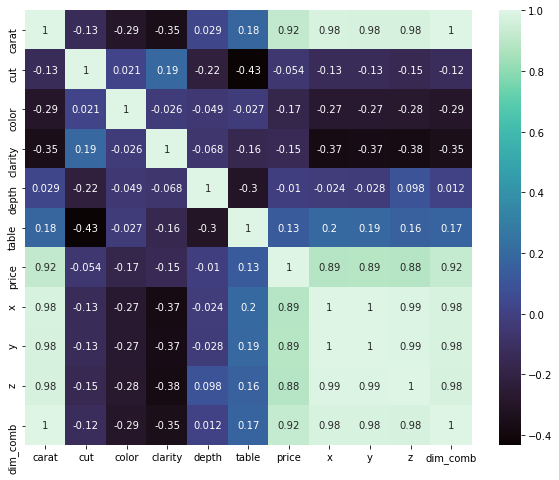

In [24]:
plt.subplots(figsize=(10,8))
sns.heatmap(diamonds.corr(), annot=True, cmap='mako')

#### Another way to check for correlation between attributes using pandas scatter_matrix() function

array([[<AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='cut', ylabel='carat'>,
        <AxesSubplot:xlabel='color', ylabel='carat'>,
        <AxesSubplot:xlabel='clarity', ylabel='carat'>,
        <AxesSubplot:xlabel='depth', ylabel='carat'>,
        <AxesSubplot:xlabel='table', ylabel='carat'>,
        <AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>,
        <AxesSubplot:xlabel='z', ylabel='carat'>,
        <AxesSubplot:xlabel='dim_comb', ylabel='carat'>],
       [<AxesSubplot:xlabel='carat', ylabel='cut'>,
        <AxesSubplot:xlabel='cut', ylabel='cut'>,
        <AxesSubplot:xlabel='color', ylabel='cut'>,
        <AxesSubplot:xlabel='clarity', ylabel='cut'>,
        <AxesSubplot:xlabel='depth', ylabel='cut'>,
        <AxesSubplot:xlabel='table', ylabel='cut'>,
        <AxesSubplot:xlabel='price', ylabel='cut'>,
        <AxesSubplot:xlabel='x', ylabel='cut'>,
  

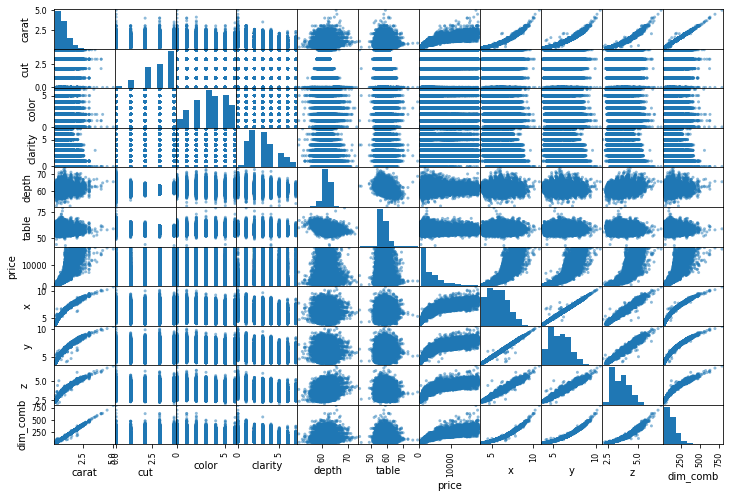

In [25]:
from pandas.plotting import scatter_matrix

scatter_matrix(diamonds, figsize=(12, 8))

In [26]:
diamonds.drop(['x', 'y', 'z'], axis = 1, inplace = True)

In [27]:
 diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']

In [28]:
x = diamonds.drop(['price', 'price_per_carat'], axis=1)
y = diamonds['price_per_carat']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [29]:
x_train.drop('carat', axis=1, inplace=True)
xtestCarat =x_test['carat'].copy()
x_test.drop('carat', axis=1, inplace=True)
print(x_train.columns)

Index(['cut', 'color', 'clarity', 'depth', 'table', 'dim_comb'], dtype='object')


C:\ProgramData\Anaconda33\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Select and Train a Model

### First train a Linear Regression model 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

#### measure this regression model’s RMSE on the whole training set 

In [31]:
lin_prediction=linear_reg.predict(x_test)* xtestCarat
linear_rmse=np.sqrt(mean_squared_error(y_test, lin_prediction))
linear_rmse

2915.7453299197214

#### Visualize the relation between actual values and the predictions

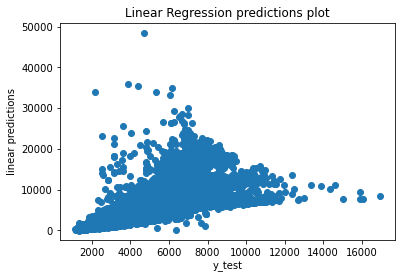

In [32]:
plt.scatter(y_test, lin_prediction)
plt.xlabel('y_test')
plt.ylabel('linear predictions')
plt.title('Linear Regression predictions plot')
plt.show()

### Training a Decision Tree model 

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

#### Evaluate the model on the training set using Scikit-Learn’s mean_squared_error() function:

In [34]:
tree_prediction=tree_reg.predict(x_test) * xtestCarat
tree_rmse=np.sqrt(mean_squared_error(y_test, tree_prediction))
tree_rmse

2376.471373583703

#### Visualize the relation between actual values and the predictions

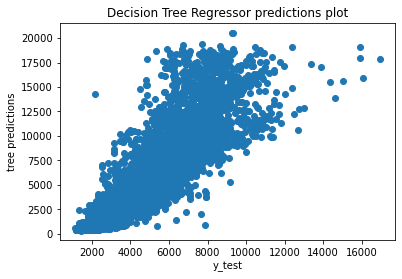

In [35]:
plt.scatter(y_test, tree_prediction)
plt.xlabel('y_test')
plt.ylabel('tree predictions')
plt.title('Decision Tree Regressor predictions plot')
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)
forest_prediction=forest_reg.predict(x_test)* xtestCarat
forest_rmse=np.sqrt(mean_squared_error(y_test, forest_prediction))
forest_rmse

2332.4437821720153

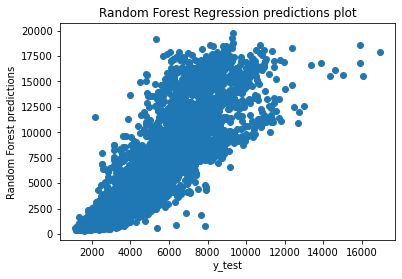

In [37]:
plt.scatter(y_test, forest_prediction)
plt.xlabel('y_test')
plt.ylabel('Random Forest predictions')
plt.title('Random Forest Regression predictions plot')
plt.show()

In [38]:
print('Linear Regression RMSE: ', linear_rmse)
print('Decision Tree Regression RMSE:', tree_rmse)
print('Random Forest Regression RMSE:', forest_rmse)

Linear Regression RMSE:  2915.7453299197214
Decision Tree Regression RMSE: 2376.471373583703
Random Forest Regression RMSE: 2332.4437821720153


In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
linear_rmse_scores = np.sqrt(-scores)
linear_rmse_scores.mean()

927.382867882153

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

557.2430874686962

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
random_forest_rmse_scores = np.sqrt(-scores)
random_forest_rmse_scores.mean()

428.2694412378087